**참고문헌: 핸즈온 머신러닝(2판), 올레리앙 제롱 지음, 박해선 옮김, 11장 – 심층 신경망 훈련하기**

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/handson-ml2/blob/master/11_training_deep_neural_networks.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

# 설정

먼저 몇 개의 모듈을 임포트합니다. 맷플롯립 그래프를 인라인으로 출력하도록 만들고 그림을 저장하는 함수를 준비합니다. 또한 파이썬 버전이 3.5 이상인지 확인합니다(파이썬 2.x에서도 동작하지만 곧 지원이 중단되므로 파이썬 3을 사용하는 것이 좋습니다). 사이킷런 버전이 0.20 이상인지와 텐서플로 버전이 2.0 이상인지 확인합니다.

In [ ]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 고속 옵티마이저

### Gradient Descent (GD) vs. Stochastic Gradient Descent (SGD)

#### GD
• 한번 학습할 때 모든 학습데이터를 가지고 연산을 진행하고, 이에 따라 연산량이 많아 학습 속도가 느린 단점
#### SGD
• 학습이 빠르게 이뤄진다는 장점이 있지만, 좌측 하단 그림의 빨간 선처럼 지그재그로 핑퐁하면서 불안정한 학습과정. 이러한 과정은 local minima(지역 최소점 과 saddle point(안장점)에 빠질 수 있다는 치명적인 단점

## 모멘텀 옵티마이저

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

## 네스테로프 가속 경사

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

## AdaGrad

In [ ]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

## RMSProp

In [ ]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

## Adam 옵티마이저

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## Adamax 옵티마이저

In [ ]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## Nadam 옵티마이저

In [ ]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## 학습률 스케줄링

In [ ]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_valid, y_valid) = mnist.load_data()
X_train = X_train.reshape((60000,28,28,1))
X_train_scaled = X_train.astype('float32') / 255

X_valid = X_valid.reshape((10000,28,28,1))
X_valid_scaled = X_valid.astype('float32') / 255

11501568/11490434 [==============================] - 0s 0us/step


### 거듭제곱 스케줄링

```lr = lr0 / (1 + steps / s)**c```
* 케라스는 `c=1`과 `s = 1 / decay`을 사용합니다

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1875/1875 [==============================] - 12s 4ms/step - loss: 0.4353 - accuracy: 0.8816 - val_loss: 0.2972 - val_accuracy: 0.9182
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2929 - accuracy: 0.9176 - val_loss: 0.2685 - val_accuracy: 0.9253
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2653 - accuracy: 0.9252 - val_loss: 0.2489 - val_accuracy: 0.9306
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2467 - accuracy: 0.9307 - val_loss: 0.2355 - val_accuracy: 0.9347
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2322 - accuracy: 0.9349 - val_loss: 0.2245 - val_accuracy: 0.9365
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2201 - accuracy: 0.9384 - val_loss: 0.2150 - val_accuracy: 0.9390
Epoch 7/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2095 - accuracy: 0.9417 - val_loss: 0.2076 - val_accuracy

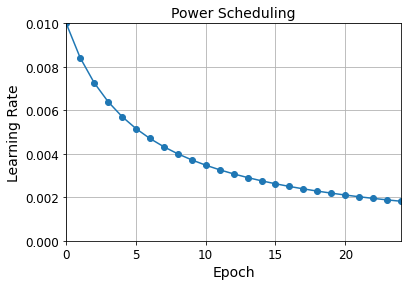

In [ ]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### 지수 기반 스케줄링

```lr = lr0 * 0.1**(epoch / s)```

In [ ]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [ ]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4310 - accuracy: 0.8924 - val_loss: 0.2540 - val_accuracy: 0.9452 - lr: 0.0100
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2343 - accuracy: 0.9460 - val_loss: 0.2484 - val_accuracy: 0.9433 - lr: 0.0089
Epoch 3/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1805 - accuracy: 0.9582 - val_loss: 0.1450 - val_accuracy: 0.9663 - lr: 0.0079
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1464 - accuracy: 0.9665 - val_loss: 0.2204 - val_accuracy: 0.9590 - lr: 0.0071
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1284 - accuracy: 0.9718 - val_loss: 0.1523 - val_accuracy: 0.9689 - lr: 0.0063
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1098 - accuracy: 0.9761 - val_loss: 0.1863 - val_accuracy: 0.9720 - lr: 0.0056
Epoch 7/25
1875/1875 [==============================] - 6

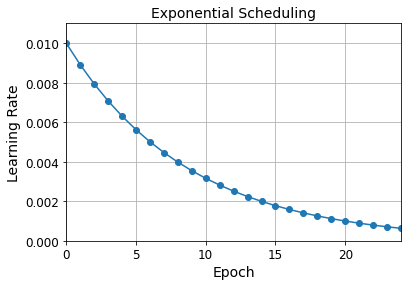

In [ ]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

이 스케줄 함수는 두 번째 매개변수로 현재 학습률을 받을 수 있습니다:

In [ ]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

에포크가 아니라 반복마다 학습률을 업데이트하려면 사용자 정의 콜백 클래스를 작성해야 합니다:

In [ ]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # 노트: 에포크마다 `batch` 매개변수가 재설정됩니다
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr * 0.1**(1 / s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # 20 에포크 동안 스텝 횟수 (배치 크기 = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4147 - accuracy: 0.8941 - val_loss: 0.3989 - val_accuracy: 0.8941 - lr: 0.0089
Epoch 2/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2340 - accuracy: 0.9439 - val_loss: 0.2056 - val_accuracy: 0.9567 - lr: 0.0079
Epoch 3/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1753 - accuracy: 0.9585 - val_loss: 0.1515 - val_accuracy: 0.9663 - lr: 0.0071
Epoch 4/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1502 - accuracy: 0.9656 - val_loss: 0.1491 - val_accuracy: 0.9648 - lr: 0.0063
Epoch 5/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1148 - accuracy: 0.9732 - val_loss: 0.2015 - val_accuracy: 0.9567 - lr: 0.0056
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1031 - accuracy: 0.9766 - val_loss: 0.1634 - val_accuracy: 0.9708 - lr: 0.0050
Epoch 7/25
1875/1875 [==============================] - 8s

In [ ]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

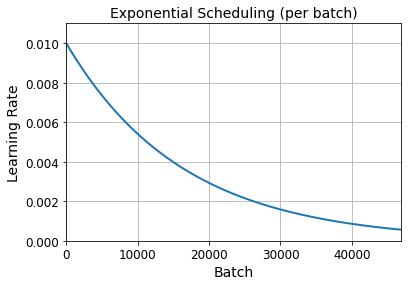

In [ ]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

### 기간별 고정 스케줄링

In [ ]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [ ]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4371 - accuracy: 0.8916 - val_loss: 0.2888 - val_accuracy: 0.9267 - lr: 0.0100
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2733 - accuracy: 0.9376 - val_loss: 0.2623 - val_accuracy: 0.9468 - lr: 0.0100
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2204 - accuracy: 0.9528 - val_loss: 0.2656 - val_accuracy: 0.9506 - lr: 0.0100
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2077 - accuracy: 0.9576 - val_loss: 0.1938 - val_accuracy: 0.9612 - lr: 0.0100
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1957 - accuracy: 0.9614 - val_loss: 0.2725 - val_accuracy: 0.9527 - lr: 0.0100
Epoch 6/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0891 - accuracy: 0.9788 - val_loss: 0.1653 - val_accuracy: 0.9669 - lr: 0.0050
Epoch 7/25
1875/1875 [==============================] - 6s

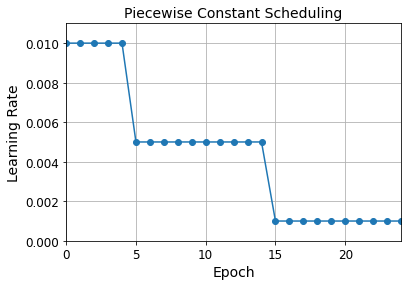

In [ ]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### 성능 기반 스케줄링

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2703 - accuracy: 0.9192 - val_loss: 0.1813 - val_accuracy: 0.9468 - lr: 0.0200
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1480 - accuracy: 0.9553 - val_loss: 0.1605 - val_accuracy: 0.9529 - lr: 0.0200
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1162 - accuracy: 0.9654 - val_loss: 0.1128 - val_accuracy: 0.9675 - lr: 0.0200
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1023 - accuracy: 0.9694 - val_loss: 0.1345 - val_accuracy: 0.9625 - lr: 0.0200
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0922 - accuracy: 0.9732 - val_loss: 0.1223 - val_accuracy: 0.9657 - lr: 0.0200
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0815 - accuracy: 0.9758 - val_loss: 0.1341 - val_accuracy: 0.9690 - lr: 0.0200
Epoch 7/25
1875/1875 [==============================] - 5s

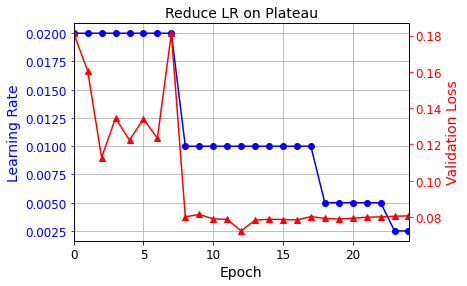

In [ ]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

### tf.keras 스케줄러

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4454 - accuracy: 0.8770 - val_loss: 0.3033 - val_accuracy: 0.9126
Epoch 2/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2927 - accuracy: 0.9165 - val_loss: 0.2725 - val_accuracy: 0.9218
Epoch 3/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2632 - accuracy: 0.9255 - val_loss: 0.2484 - val_accuracy: 0.9262
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2432 - accuracy: 0.9304 - val_loss: 0.2363 - val_accuracy: 0.9297
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2270 - accuracy: 0.9350 - val_loss: 0.2242 - val_accuracy: 0.9355
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2136 - accuracy: 0.9395 - val_loss: 0.2103 - val_accuracy: 0.9385
Epoch 7/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2024 - accuracy: 0.9427 - val_loss: 0.2045 - val_accuracy:

구간별 고정 스케줄링은 다음을 사용하세요:

In [ ]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

### 1사이클 스케줄링

In [ ]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

**경고**: `on_batch_end()` 메서드에서 `logs["loss"]`로 배치 손실을 모으지만 텐서플로 2.2.0에서 (에포크의) 평균 손실로 바뀌었습니다. (텐서플로 2.2 이상을 사용한다면) 이런 이유로 아래 그래프가 이전보다 훨씬 부드럽습니다. 이는 그래프에서 배치 손실이 폭주하기 시작하는 지점과 그렇지 않은 지점 사이에 지연이 있다는 뜻입니다. 따라서 변동이 심한 그래프에서는 조금 더 작은 학습률을 선택해야 합니다. 또한 `ExponentialLearningRate` 콜백을 조금 바꾸어 (현재 평균 손실과 이전 평균 손실을 기반으로) 배치 손실을 계산할 수 있습니다:

```python
class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_epoch_begin(self, epoch, logs=None):
        self.prev_loss = 0
    def on_batch_end(self, batch, logs=None):
        batch_loss = logs["loss"] * (batch + 1) - self.prev_loss * batch
        self.prev_loss = logs["loss"]
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(batch_loss)
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)
```

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

469/469 [==============================] - 2s 4ms/step - loss: 4791483392.0000 - accuracy: 0.3325


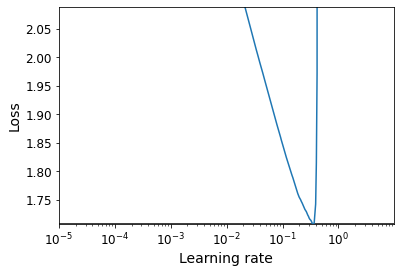

In [ ]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [ ]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)